<a href="https://colab.research.google.com/github/deepa2909/Random-Forest-XG-Boost-Logistic-Regression-and-ROC/blob/main/Random-Forest-XG-Boost-Logistic-Regression-and-ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This task uses logistic regression model  to predict Personal Loan target for the Universal Bank data. The performance of this model will be compared with the previously created models on the same data set and 
Based on the performance of the models recommendations will be made. 






## Introduction and Overview




In this, we are using Universal Bank data set to predict wheather a customer will be potential customer for personal loan requirement for the bank or not. In this section, we will be creating, training and validating the logistic regression model.

## Step 1: Install and import necessary packages

In [ ]:
# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import numpy as np

## Step 2: Load, clean and prepare data


### 2.1 Read data (UniversalBank.csv)

In [ ]:
bank_df = pd.read_csv("https://raw.githubusercontent.com/timcsmith/MIS536-Public/master/Data/UniversalBank.csv")

### 2.2 Explore the dataset

In [ ]:
# Explore the dataset
# read the first row of the dataset 
print(bank_df.head())
print(bank_df.columns)
print(bank_df.describe())
print(bank_df.info())

   ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]
Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
                ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.

### 2.3 Clean/transform data (where necessary)

In [ ]:
# based on findings from data exploration, we need to clean up colum names
bank_df.columns = [s.strip().replace(' ','_') for s in bank_df.columns] # list comprehension, all columns
bank_df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#replace negative min experience value to 0.
bank_df[bank_df['Experience']<0] =0
bank_df.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,2475.255600,45.083400,20.119600,73.046800,92182.797000,2.366600,1.915792,1.859400,56.045400,0.096000,0.10320,0.06040,0.590800,0.291000
std,1458.007058,12.173351,11.440484,46.479457,9684.939581,1.167937,1.749641,0.856842,101.460724,0.294621,0.30425,0.23825,0.491735,0.454269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,1215.750000,35.000000,10.000000,38.000000,91775.000000,1.000000,0.670000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,2471.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000
75%,3737.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.00000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.00000,1.000000,1.000000


Drop ID and Zip code columns

In [ ]:

bank_df = bank_df.drop(columns=['ID', 'ZIP_Code'])
bank_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


Create dummy variables for categorical variable Education

In [ ]:

bank_df["Education"] = bank_df["Education"].astype('category')
bank_df = pd.get_dummies(bank_df, prefix_sep= '_', drop_first= False)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_0,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,0,1,0


## Step 3 Split data intro training and validation sets

In [ ]:
# construct datasets for analysis
target = 'Personal_Loan'
predictors = ['Age', 'Experience', 'Income',	'Family',	'CCAvg',	'Mortgage',	'Securities_Account',	'CD_Account',	'Online',	'CreditCard',	'Education_0', 'Education_1', 'Education_2']
X = bank_df[predictors]
X_scaled = preprocessing.scale(X)
y = bank_df[target]
encoder = LabelEncoder()
encoder.fit(y)
print(X_scaled)
print(y)

[[-1.64994898 -1.67139016 -0.5174158  ... -0.10251486  1.18484014
  -0.61958979]
 [-0.00685172 -0.09787278 -0.8401713  ... -0.10251486  1.18484014
  -0.61958979]
 [-0.4997809  -0.44754331 -1.33506306 ... -0.10251486  1.18484014
  -0.61958979]
 ...
 [ 1.47193582  1.65047986 -1.05534163 ... -0.10251486 -0.84399572
  -0.61958979]
 [ 1.63624555  1.73789749 -0.5174158  ... -0.10251486 -0.84399572
   1.61397109]
 [-1.40348439 -1.40913726  0.21416334 ... -0.10251486  1.18484014
  -0.61958979]]
0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal_Loan, Length: 5000, dtype: int64


# create the training set and the test set 

In [ ]:

train_X, valid_X, train_y, valid_y = train_test_split(X_scaled,y, test_size=0.3, random_state=1)


In [ ]:
train_X=pd.DataFrame(train_X)
valid_X=pd.DataFrame(valid_X)

## Step 4: Create and train model


### 4.1 Create a logistic regression using all of the default parameters

In [ ]:
logClassifier = LogisticRegression(random_state=1)


### 4.2 Fit the model to the training data

In [ ]:
logClassifier.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### ROC Curve

Logistic: ROC AUC=0.958
No Skill: ROC AUC=0.500


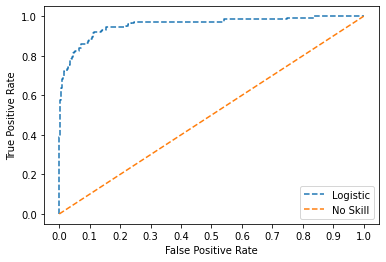

In [ ]:
model_probs = logClassifier.predict_proba(valid_X)[:,1]
ns_probs = [0 for _ in range(len(valid_y))]

# calculate scores
model_auc = roc_auc_score(valid_y, model_probs)
ns_auc = roc_auc_score(valid_y, ns_probs)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (model_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc curves
model_fpr, model_tpr, _ = roc_curve(valid_y, model_probs)
ns_fpr, ns_tpr, _ = roc_curve(valid_y, ns_probs)

# plot the roc curve for the model
plt.plot(model_fpr, model_tpr, linestyle='--', label='Logistic')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xticks(np.arange(0, 1.1, .1))

# show the legend
plt.legend()
# show the plot
plt.show()

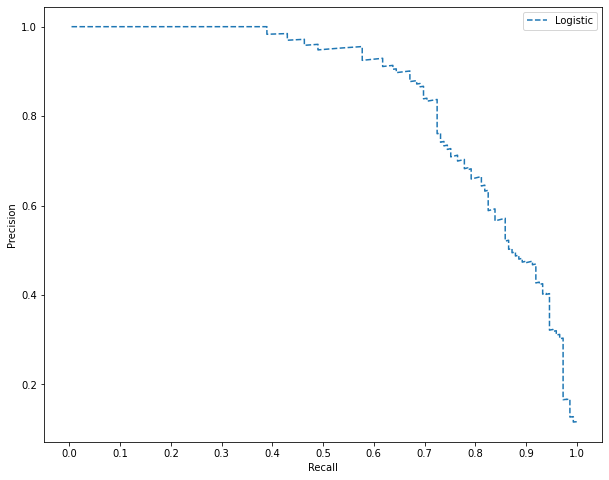

In [ ]:

precision, recall, thresholds = precision_recall_curve(valid_y, model_probs)

plt.figure(figsize=(10,8))

# plot the roc curve for the model
plt.plot(recall, precision, linestyle='--', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()


plt.xticks(np.arange(0, 1.1, .1))

# show the plot
plt.show()

In [ ]:
THRESHOLD = 0.50
validation_predictions_threshold50 = np.where(logClassifier.predict_proba(valid_X)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame({"predicted":validation_predictions_threshold50, "actual":valid_y})




,predicted,actual
2764,0,0
4767,0,0
3814,0,0
3499,0,0
2735,0,0
...,...,...
4140,0,0
3969,0,0
2535,0,0
1361,0,0


In [ ]:
print(confusion_matrix(valid_y, validation_predictions_threshold50))
print(accuracy_score(valid_y, validation_predictions_threshold50))
print(precision_score(valid_y, validation_predictions_threshold50))
print(recall_score(valid_y, validation_predictions_threshold50))

[[1340   11]
 [  52   97]]
0.958
0.8981481481481481
0.6510067114093959


In [ ]:
THRESHOLD = 0.002
validation_predictions_threshold2 = np.where(logClassifier.predict_proba(valid_X)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame({"predicted":validation_predictions_threshold2, "actual":valid_y})


,predicted,actual
2764,1,0
4767,0,0
3814,0,0
3499,1,0
2735,1,0
...,...,...
4140,0,0
3969,1,0
2535,1,0
1361,1,0


In [ ]:
print(confusion_matrix(valid_y, validation_predictions_threshold2))
print(accuracy_score(valid_y, validation_predictions_threshold2))
print(precision_score(valid_y, validation_predictions_threshold2))
print(recall_score(valid_y, validation_predictions_threshold2))

[[562 789]
 [  2 147]]
0.4726666666666667
0.15705128205128205
0.9865771812080537


# **Discussion**

We used the same dataset Universal Bank in three assignments before i.e, Assignment 2, 4, and 6. We will be combining output of the previous assignments and this one and make recommendations.



# Outcome of Assignment 2 

The predictor used is 'Accuracy', Algorithm used - KNN


*   Based on the accuracy performance measure the optimal value comes out to be  k = 5. However, accuracy parameter doesn't convey much about the recall of the model. That is we do not know how the model is doing when it comes to predict the right number of potential customers for the loan. It may happen the accuracy is high of the model but it has low recall value. Therefore, I do not recommend using this model.




# **Outcome of Assignment 4**

Performance measure used: Accuracy, recall, and precision
Algorithm: Naive Bayes

    Accuracy 0.902
    Recall 0.902
    Precision 0.813604
    Confusion Matrix:
    array([[1804,    0],
       [ 196,    0]])


From confusion matrix we can see that a huge number of FN is there and TP and FP are 0. This model is not surving the purpose of solving the problem of business model, i.e, predicting right number of customers who are potential customer for loan. Therefore, this model is not recommended.

# **Outcome of Assignment 6**

Performance measure used: Accuracy, Recall, Precision and F1 score
Algorithms used: Decision Tree, Random Forest, XGBoost

** 1. Decision Tree (with default and with hyperparmater tuning)**

The model seem to work fine with considerably good accuracy of 0.97 Below is the output of the performance measure with default parameters:

    Confusion matrix:
        [[1335   16]
          [  19  130]]
    Accuracy:  0.9766666666666667
    Precision:  0.8904109589041096
    Recall:  0.87248322147651
    F1 Score:  0.8813559322033899

For this, the model performance needs to improved on correctly predicting more and more FN. Therefore, we need to improve the recall performance measure.

By improving FN, we will be predicting correctly the customers who are potential customer to the bank and reducing the posiibility of losing potential customers for personal loan requirement due to incorrect prediction.

By looking at the confusion matrix, recall score and other performance measure after running the decision tree model with hyperparmater tuning, the recall score doesn't improve, in fact, it is performning worse than default parameters. Therefore, this model is not recommended.

So far, decision tree with default parameters is performing the best and we will be comapring other model performance with this one in order to pick the best performing model.

**2. Random Forest (with default and with hyperparmater tuning)**

Below is the output of the performance measure with default parameters:

    Confusion Matrix: 
          [[1348    3]
            [  25  124]]

    Accuracy:  0.9813333333333333
    Precision:  0.9763779527559056
    Recall:  0.8322147651006712
    F1 Score:  0.8985507246376812

Although, the random forest modelwith default parameters on run gives a higher accuracy when compared to the decision tree with default parameters but the recall is lower in the random forest case. The improved accuracy and precision score is because this model predicts correctly higher number TN and lesser number of FP. But, the model will work in benefit of the bank if it has higher recall score or lower number of FN. Therefore, when compared with decision tree with default parameters and random forest with default parameters, still decision tree with default parameters is performing the best.

Now, I will compare the performance of hyperparamater tunned random forest model with the default parameter decision tree to find out which one performing better.

After hyperparamter tuning on random forest, the performance parametes comes out to be:

    Confusion Matrix: 
        [[1347    4]
        [  23  126]]
    Accuracy:  0.982
    Precision:  0.9692307692307692
    Recall:  0.8456375838926175
    F1 Score:  0.9032258064516129

By fine tuning the hyperparameters of random forest model we get higher accuracy compared to the default random forest and recall score is improved but when comparing with default decision tree model the recall score is still not higher or in fact is lower. A higher true negative number is contributing in improving the precision of the model and overall accuracy of the model but is not solving the purpose of predicting the right or correct TP or potential personal loan customer for the bank. Therefore, this model is still not recommended over the decision tree with default parameters.

Now, I will comparing the performance of XGBoost model with default and Hyperparamter paramerter to conclude better performing model.

**3. XGboost (with default and with hyperparmater tuning)**

After running XGboost with default parameters, performance measures comes out to be:

    Confusion Matrix: 
      [[1343    8]
      [  21  128]]
    Accuracy:  0.9806666666666667
    Precision:  0.9411764705882353
    Recall:  0.8590604026845637

On comparing XGboost defualt parameters with Decision Tree default parameters, the DT default still has higher recall. Therefore, I would not recommend this model over the decision tree default model.

Finally, on hyperparameter tunning of XGboost model, the performance measure comes out to be: Confusion Matrix: [[1346 5] [ 18 131]] Accuracy Score: 0.9846666666666667 Precision Score: 0.9632352941176471 Recall Score: 0.8791946308724832 F1 Score: 0.9192982456140351

On comparining with Decision Tree default parameters, the XGboost model with hyperparameter tuning has a slighly improved recall score which is due to a little improvement in predicting FN. Although, there is not a big difference but with more data, this XGBoost model with hyperparameter tunning will perform better over the Decision Tree default parameters. Also, accuracy, precision and F1 score, i.e, average of recall and precision also is higher.

**Therefore, out of these three models, XGBoost with hyperparameter truning works the best here.**



# Outcome of Assignment 7

Performance measure used: Accuracy, Precision and Recall
ROC curve, precision and recall chart

Algorithm used: Logistic regression

    Confusion matrix:
    [[562 789]
    [  2 147]]
    Acuuracy: 0.4726666666666667
    Precision: 0.15705128205128205
    Recall: 0.9865771812080537

After looking at the confusion matrix, model does really well at predicting FN. Gives a really good recall score, which is the requirement of the model to predict potential customer for loan. Although, it shows a high FP = 789 which means more work for the business to segregate FP from TP but that can be resolved.

From the ROC curve model, we can see model does well.
From precision and recall curve we can see they are inversely related if recall is high then precision value going to be low and vice versa. 

So, we have to pick the trade off.

The high recall value is obtained at a very low thresold of 0.0002


# Comparing All models

On comparing all the performance measure of all the models, the XGBoost works the better than other models because it has good accuracy, precision, and quite high recall score. However, in Logistic Regression model we get highest recall score but it gives quite low accuracy, therefore, it is not advicable to recommend this model. 

I would recommend XGBoost for this case. As Low chances of losing a potential customer, a good accuracy and precision score is shown by this model. 

The models needs to be re-evaluated if more data is gathered to check how it performs then.
